# Taller 03 Práctico. Procesamiento Digital de Señales

In [10]:
import numpy as np                  # Libreria Numpy para los procesos matematicos
import matplotlib.pyplot as plt     # Libreria usada para graficas
import scipy.signal as sp           # Trabajar con señales

### Problema 1. Genere una señal sinusoidal de amplitud 1 y frecuencia del cuadrado del tiempo, y, diseñe un filtro pasa-bajos, pasa-altos, pasa-bandas y rechaza-bandas para filtrar esta señal. La frecuencia de corte es de 10Hz. Use una frecuencia de muestreo adecuada para muestrear la señal correctamente. Suponga una ganancia del filtro de 0dB, un rizado del 10% y un ancho de banda de transicion de 4Hz.

<img src="Imagenes/fig01.png">

<img src="Imagenes/rect.png">
<img src="Imagenes/hann.png">
<img src="Imagenes/hamming.png">
<img src="Imagenes/blackman.png">

<img src="Imagenes/tabla.png">

In [11]:
fc = 10                     # Frecuencia de corte
fs = 100*fc                 # Frecuencia de muestreo
t = np.arange(0, 10, 1/fs)  # Vector de tiempo
f = t**2                    # Frecuencia cuadratica
w = 2*np.pi*f               # Frecuencia en radianes
x = np.sin(w*t)             # Señal

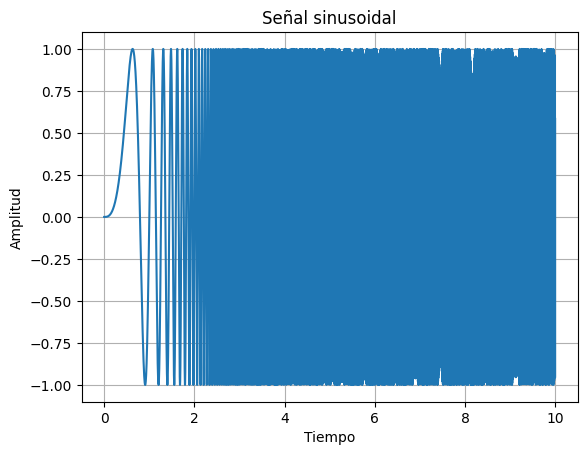

In [12]:
#Grafica
plt.figure()
plt.title("Señal sinusoidal")
plt.plot(t, x)
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.show()

In [13]:
X = np.fft.fft(x) # FFT de la señal filtrada para mostrarla mas comodamente
freq_X = np.fft.fftfreq(X.size)*fs # Vector de frecuencias

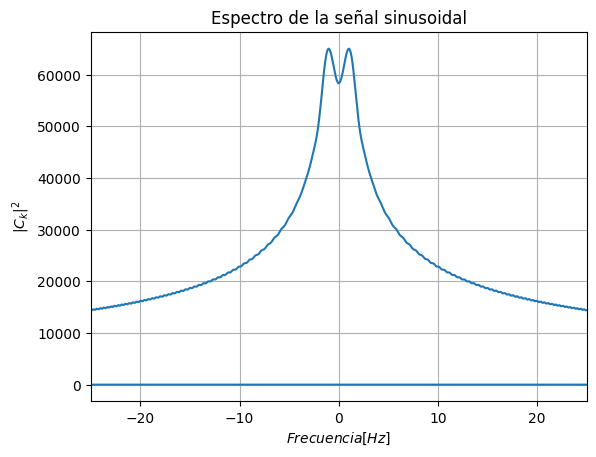

In [14]:
# Grafica
plt.figure()
plt.plot(freq_X, abs(X)**2)
plt.xlim([-25, 25])
plt.xlabel('$Frecuencia [Hz]$')
plt.ylabel('$|C_{k}|^2$')
plt.title('Espectro de la señal sinusoidal')
plt.grid()
plt.show()

Con un rizado del 10% se tiene que $20log_{10}(0.1)=-20dB$. Por lo que se puede usar una ventana rectangular o cualquier otra. En este caso se va a usar una ventana rectangular.

Para una ventana rectangular: $M\geq \frac{2F_s}{\Delta F_m}+1$

Para una ventana de Hanning: $M\geq \frac{4F_s}{\Delta F_m}$

Para una ventana de Hamming: $M\geq \frac{4F_s}{\Delta F_m}$

Para una ventana de Blackman: $M\geq \frac{6F_s}{\Delta F_m}$

#### 1. Diseño del filtro pasa-bajos

In [15]:
fm = 4
M = 2*(fs/fm)+1
if (M%2 == 0):
    M += 1
M = int(M)
print('Orden del filtro: ', M)
wc = 2*np.pi*(fc/fs)
n = np.arange(-M//2+1, M//2+1)
hi = (wc/np.pi)*np.sinc(wc*n/np.pi)
win = np.ones(len(n))
h = hi*win
w, Hw = sp.freqz(h, 1, whole = True, worN=4096)

Orden del filtro:  501


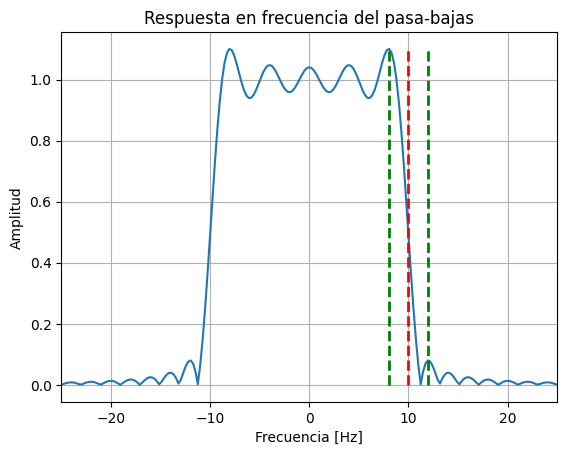

In [16]:
# Grafica
plt.figure()
plt.title('Respuesta en frecuencia del pasa-bajas')
plt.plot((w-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hw)))
plt.vlines(fc, 0, 1.1, color='r', lw=2, linestyle='--')
plt.vlines(fc+fm/2, 0, 1.1, color='g', lw=2, linestyle='--')
plt.vlines(fc-fm/2, 0, 1.1, color='g', lw=2, linestyle='--')
plt.xlim([-25, 25])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

#### Proceso de filtrado con el pasa-bajos

In [17]:
y = np.convolve(h, x, mode = 'same') # Se filtra la señal requerida
Y = np.fft.fft(y) # FFT de la señal filtrada para mostrarla mas comodamente
freq_Y = np.fft.fftfreq(Y.size)*fs # Vector de frecuencias

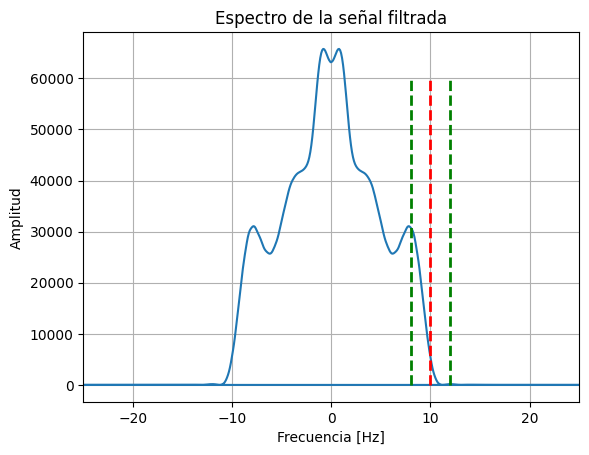

In [18]:
# Grafica
plt.figure()
plt.title('Espectro de la señal filtrada')
plt.plot(freq_Y, abs(Y)**2)
plt.vlines(fc, 0, 60000, color='r', lw=2, linestyle='--')
plt.vlines(fc+fm/2, 0, 60000, color='g', lw=2, linestyle='--')
plt.vlines(fc-fm/2, 0, 60000, color='g', lw=2, linestyle='--')
plt.xlim([-25, 25])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()
